In [2]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.express as px
import pandas as pd
import numpy as np

**Tahapan Pengerjaan Tugas**
1. Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)
2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)
3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

In [3]:
pd.set_option('max_columns', 50)
df = pd.read_csv('cleaned_hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out
1,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out
2,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out
3,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out
4,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103.0,0,1,Check-Out


In [4]:
# create new feature: total stay duration
df['total_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df['total_duration'].value_counts()

3     17527
1     16908
2     15332
4     13382
7      7464
5      6698
6      3249
10     1071
8      1059
14      857
9       778
11      366
12      196
13      132
15       69
21       55
28       34
16       33
19       22
18       22
17       20
25       14
29       13
20       13
22       12
30       11
26        6
24        6
23        5
35        5
27        4
42        4
56        2
33        2
60        1
69        1
46        1
45        1
38        1
48        1
34        1
Name: total_duration, dtype: int64

In [5]:
def duration_and_cancelation(df):
    df = df.copy()
    
    # grouping the stay duration per week
    def grouping_week(row):
        if row < 14:
            return row
        if row >= 14:
            return 14
    df['duration_group'] = df['total_duration'].apply(grouping_week)
    
    # aggregating is_cancelled
    df_agg = df.groupby(['hotel', 'duration_group']).agg({
        'is_canceled': ['sum', 'count']
    })
    df_agg = df_agg.reset_index()
    df_agg.columns = ['hotel_type', 'duration_group', 'total_cancellation', 'total_booking']
    
    # calculate cancellation rate
    df_agg['cancellation_rate'] = df_agg['total_cancellation'] * 100 / df_agg['total_booking']
    df_agg['cancellation_rate'] = df_agg['cancellation_rate'].round(2)
    
    return df_agg
        
duration_and_cancelation(df)

,hotel_type,duration_group,total_cancellation,total_booking,cancellation_rate
0,City Hotel,1,2259,10100,22.37
1,City Hotel,2,3133,10507,29.82
2,City Hotel,3,4182,13318,31.40
3,City Hotel,4,3059,9499,32.20
4,City Hotel,5,1257,4144,30.33
5,City Hotel,6,610,1632,37.38
6,City Hotel,7,692,1837,37.67
7,City Hotel,8,166,361,45.98
8,City Hotel,9,87,198,43.94
9,City Hotel,10,110,188,58.51


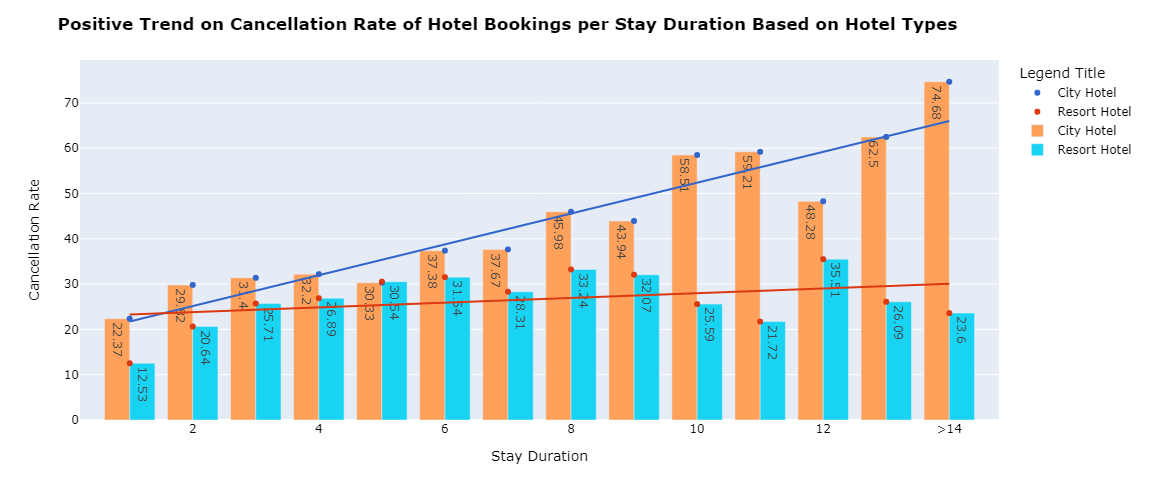

In [18]:
df_agg = duration_and_cancelation(df)
city = df_agg[df_agg['hotel_type']=='City Hotel']
resort = df_agg[df_agg['hotel_type']=='Resort Hotel']
fig = px.scatter(df_agg,
                 x='duration_group',
                 y='cancellation_rate',
                 color='hotel_type',
                 trendline='ols',
                 height=500,
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.add_bar(x=city['duration_group'],
            y=city['cancellation_rate'],
            name='City Hotel',
            text=city['cancellation_rate']
            )
fig.add_bar(x=resort['duration_group'],
            y=resort['cancellation_rate'],
            name='Resort Hotel',
            text=resort['cancellation_rate']
            )
fig.update_layout(
    title='<b>Positive Trend on Cancellation Rate of Hotel Bookings\nper Stay Duration Based on Hotel Types<b>',
    xaxis_title='Stay Duration',
    yaxis_title='Cancellation Rate',
    legend_title="Legend Title",
    font=dict(
        size=12,
        color='black'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2, 4, 6, 8, 10, 12, 14],
        ticktext = ['2', '4', '6', '8', '10', '12', '>14']
    )
)
fig.show()